## Transformations in Political Economy - Technological Change and Populism (POL63102)
### Coding Session 3: Multivariate Linear Regression

---
This document guides you through coding session 3. Please try to follow the instructions on your own PC and feel free to ask questions if something is unclear. After this session you should be able to do the following:

- Implement Multivariate Linear Regression
- Use Robust Standard Errors
---

Let's start as usual by importing modules and loading data. Note that we also load the **econtools** module for additional econometric functionalities (e.g. robust or clustered standard errors).

In [6]:
import pandas as pd
import numpy as np
import econtools.metrics as mt

df = pd.read_stata('C:/Users/felix/Dropbox/HfP/Teaching/SoSe21/Populism_Course/data/Autor_data_extract.dta')

Remember that the data covers 3,722 county-district cells and contains amongst others the following variables:
- *d2_shnr_2002_Y* are the main outcome variables measuring the change in the Republican two-party vote share percentage between year 2002 and year Y = 2004, ..., 2016
- *d_imp_usch_pd* is the main independent variable for local labor market exposure to import competition from China
- *l_shind_manuf_cbp* is a control variable for manufacturing employment share

Let's produce summary statistics for these variables:

In [13]:
df[["d2_shnr_2002_2016","d_imp_usch_pd", "l_shind_manuf_cbp"]].describe().T

,count,mean,std,min,25%,50%,75%,max
d2_shnr_2002_2016,3767.0,8.358822,25.995949,-95.661407,-6.477878,6.811324,23.068745,100.000000
d_imp_usch_pd,3772.0,0.754591,0.652882,-0.259663,0.343260,0.623485,0.966137,6.079161
l_shind_manuf_cbp,3772.0,0.189763,0.097713,0.001083,0.115888,0.170197,0.257179,0.552423


In a multivariate regression model, we add more variables to the right of the regression equation:

\begin{align}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon
\end{align}

what can also be written in matrix notation as

\begin{align}
y = \textbf{X'}\beta + \epsilon
\end{align}

where the transposed matrix $\textbf{X'}$ is composed of all k variables $x_1, x_2, ... , x_k$ and a constant vector of 1s in the regression. 

The econtools function also allows us to use heteroskedasticity-robust standard errors ("robust standard errors") by specifying vce_type='robust'. One can also implement clustered standard errors on a given level by specifying cluster=[cluster_var].

In [ ]:
# help(mt.reg)

In [66]:
# Estimate multivariate linear regression with robust standard errors
result = mt.reg(df,                                     # DataFrame to use
                "d2_shnr_2002_2016",                    # Outcome
                ["d_imp_usch_pd" ,"l_shind_manuf_cbp"], # Indep. Variables
                addcons=True,                           # Adds Constant
                vce_type='robust'                       # Uses Heteroscedasticity-Robust Standard Errors  
)

# Show results
result.summary                                          # Print regression results

,coeff,se,t,p>t,CI_low,CI_high
d_imp_usch_pd,-3.665477,0.773381,-4.739551,2.221119e-06,-5.181763,-2.149191
l_shind_manuf_cbp,47.990231,5.429824,8.838266,1.464815e-18,37.344548,58.635913
_cons,2.016612,0.886969,2.273600,2.304614e-02,0.277626,3.755598


Note that the coefficient on import competition is $\hat \beta_1=-3.67$ (as compared to  $\hat \beta_1=1.03$ in the simple model in the previous coding session). Note that using robust standard errors does not affect coefficient size, but their standard errors and hence statistical significance.

**Exercise:** 
* What does it mean that $\hat \beta_1$ changes when including manufacturing employment share as another explanatory variable? 
* Discuss whether you might want to use clustered standard errors in this setting.

---
**Congratulations! This is the end of coding session 3.**

### Visualize coefficients

In [71]:
beta_x1 = result.beta["d_imp_usch_pd" ]                          # Get coefficient by variable name

[Text(0, 0.5, 'Coefficient Size'),
 Text(0.5, 0, 'Variable'),
 Text(0.5, 1.0, 'Coefficient plots')]

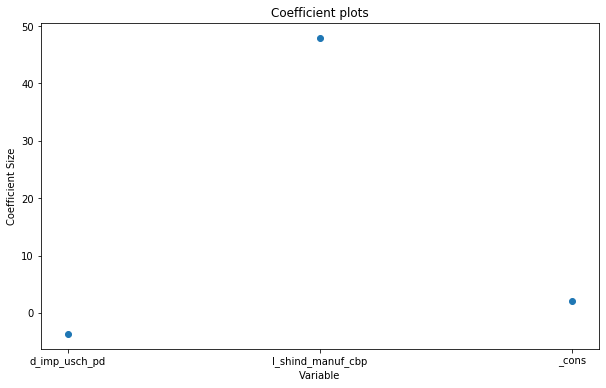

In [73]:

# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.scatter(result.beta.index, result.beta)

# Set plot title and axes labels
ax.set(title = "Coefficient plots",
       xlabel = "Variable",
       ylabel = "Coefficient Size")